## Car Crashes in Montgomery County EDA

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 50)

### Import Data

In [3]:
# Original crash data
crash_orig_df = pd.read_csv('./data/crash_reporting_drivers_data.csv', low_memory=False)
crash_orig_df['Crash Date/Time'] = pd.to_datetime(crash_orig_df['Crash Date/Time'])

In [4]:
# Modified crash data
crash_mod_df = pd.read_csv('./data/crash_data_modified.csv', low_memory=False)

In [5]:
# Categorized crash data
crash_cats_df = pd.read_csv('./data/crash_categorical.csv', low_memory=False)

### Functions

In [6]:
# Prints subplots (sns.countplots) for drivers at fault, under the influence, and distracted in crashes
# Percentages on bars idea from:
#### https://stackoverflow.com/a/63479557
#### https://www.tutorialspoint.com/how-to-add-percentages-on-top-of-bars-in-seaborn-using-matplotlib

def get_fault_drug_distracted(daf, dsa, dd):
    fig = plt.figure(figsize = (15,5))
    
    ax1 = fig.add_subplot(1,3,1)
    fig.subplots_adjust(wspace=.5)
    total1 = float(crash_mod_df[daf].count())
    ax_1 = sns.countplot(data = crash_mod_df, x = daf, ax=ax1)
    for p in ax_1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total1)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax_1.annotate(percentage, (x, y),ha='center')
    
    ax2 = fig.add_subplot(1,3,2)
    fig.subplots_adjust(wspace=.5)
    total2 = float(crash_mod_df[dsa].count())
    ax_2 = sns.countplot(data = crash_mod_df, x = dsa, ax=ax2)
    for p in ax_2.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax_2.annotate(percentage, (x, y),ha='center')
    
    ax3 = fig.add_subplot(1,3,3)
    fig.subplots_adjust(wspace=.5)
    total3 = float(crash_mod_df[dsa].count())
    ax_3 = sns.countplot(data = crash_mod_df, x = dd, ax=ax3);
    for p in ax_3.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total3)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax_3.annotate(percentage, (x, y),ha='center')



In [7]:
# gets sns.countplot for one feature
def get_count(df, feature):
    plt.figure(figsize = (15,7))
    plt.title(f'Count of Crashes by {feature}')
    total = float(df[feature].count())
    plt.xticks(rotation = 50)
    ax = sns.countplot(data = df, x = feature);
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

In [8]:
def get_intersections(df):
    df_inters = df[['Road Name', 'Cross-Street Name']]
    df_inters1 = df_inters.dropna()
    # Needed to avoid nasty warning
    df_inters2 = df_inters1.copy(deep=True)
    df_inters2['intersection'] = df_inters2['Road Name'] + " and " + df_inters2['Cross-Street Name']
    
    plt.figure(figsize = (15,5))
    plt.title(f'Count of Crashes by Intersection')
    total = float(df_inters2['intersection'].count())
    plt.xticks(rotation = 50)
    ax = sns.countplot(data = df_inters2, x = 'intersection', 
                       order=df_inters2['intersection'].value_counts().iloc[:10].index);
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

### Yearly Crash Trend

In [9]:
def get_count_no_pct(df, feature):
    plt.figure(figsize = (15,5))
    plt.title(f'Count of Crashes by {feature}')
    plt.xticks([0,1,2,3,4,5,6],['2015','2016','2017','2018','2019','2020','2021(Jan-Nov)'])
    sns.countplot(data = df, x = feature);

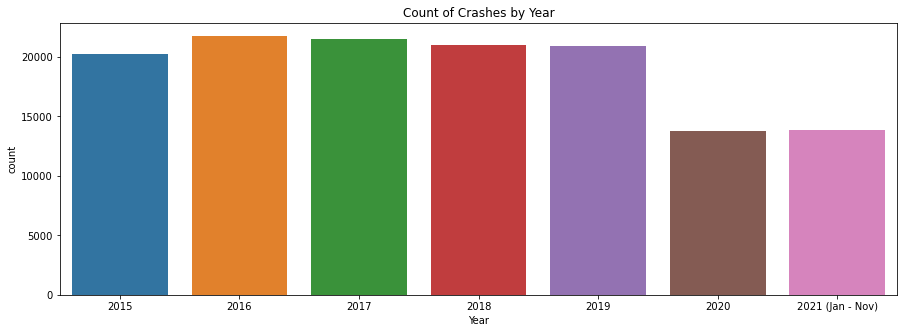

In [10]:
crash_orig_df['Year'] = crash_orig_df['Crash Date/Time'].dt.year
crashes_yearly = crash_orig_df[['Year']]
crashes_yearly1 = crashes_yearly.sort_values(by='Year')
crashes_yearly1['Year'] = crashes_yearly1['Year'].apply(lambda x: str(x))
#Not sure why this code breaks at the next line.
#crashes_yearly1['Year'] = crashes_yearly1['Year'].apply(lambda x: '2021 (Jan - Nov)' if x == '2021')
# However, this line works
crashes_yearly1['Year'] = crashes_yearly1['Year'].map({'2015': '2015', 
                                                       '2016': '2016',                                                       '2016': '2016',
                                                       '2017': '2017',
                                                       '2018': '2018',
                                                       '2019': '2019',
                                                       '2020': '2020',
                                                       '2021': '2021 (Jan - Nov)'})
get_count_no_pct(crashes_yearly1, 'Year')

### Counts: Driver at-fault, Driver Drug Abuse, and Driver Distracted

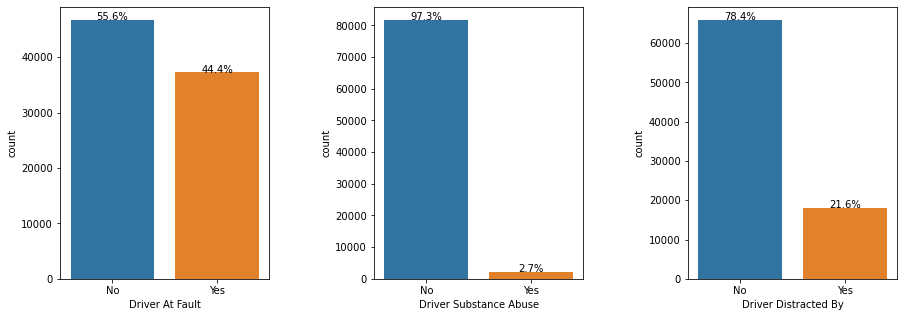

In [11]:
get_fault_drug_distracted('Driver At Fault', 'Driver Substance Abuse', 'Driver Distracted By')

##### Observations:
The figures below shows how the data  is balanced for features such as driver at fault, driver substance abuse, and whether the driver was distracted. We are able to see that for these three features, the data is not balanced. Figure 1 can be seen to be the most balanced feature among the three. It shows that 44.4% of drivers were at fault while 55.6% of drivers were not at fault. Next figure 2 shows the distribution of data in terms of substance abuse. This is an important feature to take into consideration due its degree of danger, with that said among all drivers, 2.7% are intoxicated. Finally figure 3, shows a feature that describes whether or not a driver was distracted. We are able to see that 78.4 % accounts for non distracted drivers and 21.6 % accounts for drivers being distracted.

### Count: Time of Day Crash Occurred

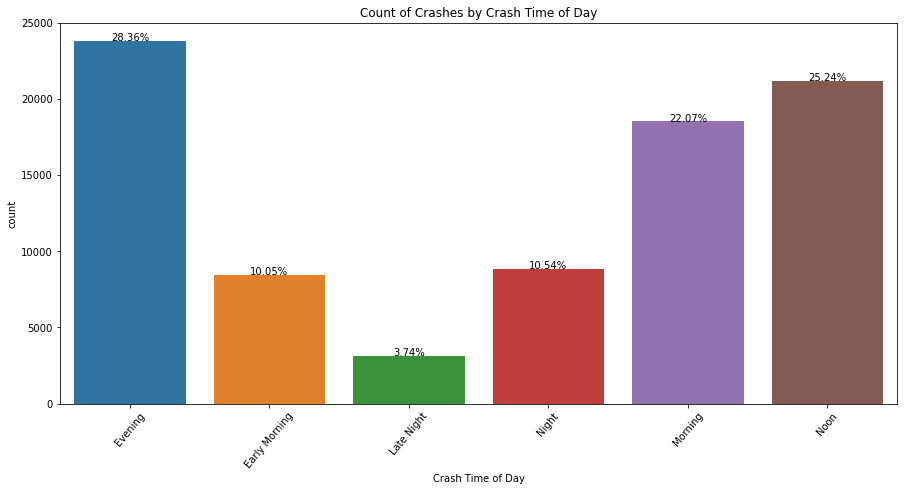

In [12]:
get_count(crash_mod_df, 'Crash Time of Day')

##### Observations:
In order to be better visualized, the time frame in a day was divided into 6 sections :early morning, morning, noon, evening, night, and late night. We are able to see that most crashes occurred during the evening, noon, and morning respectively. These three times of the day account for 75.7% of the crashes. Furthermore all these accidents happened during day light, something that surprised the analysts of this investigation. After putting thought into it, we realized that these three time of the day were rush hours: morning going to work, noon going out for lunch, evening coming back from work in a rush.

### Count: Surface Conditions at Time of Crash

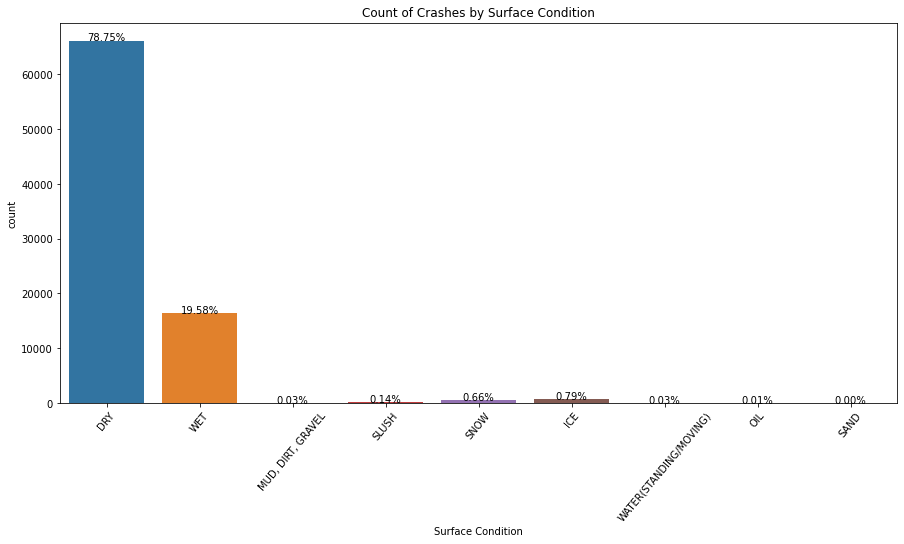

In [13]:
get_count(crash_mod_df, 'Surface Condition')

### Count: Weather Conditions at Time of Crash

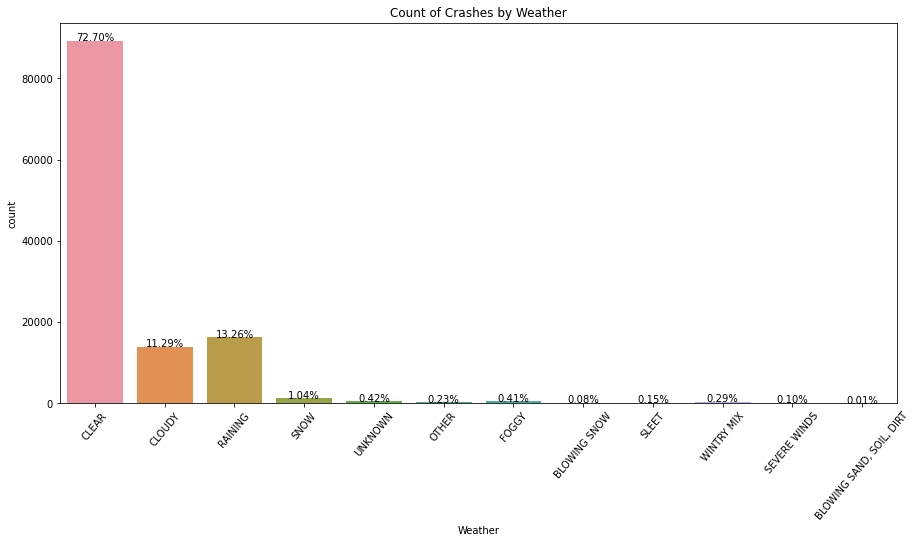

In [14]:
get_count(crash_orig_df, 'Weather')

### Count: Crashes by Intersection

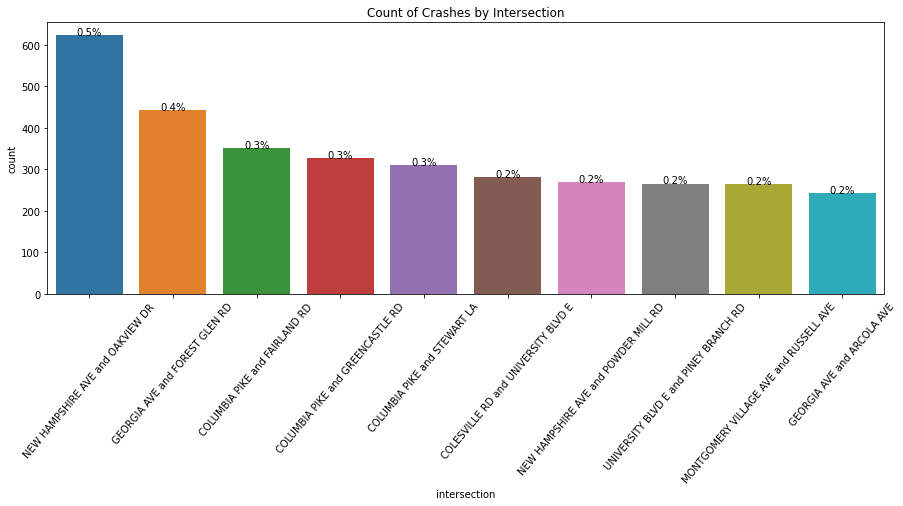

In [15]:
get_intersections(crash_orig_df)

### Count: Crash by Lighting

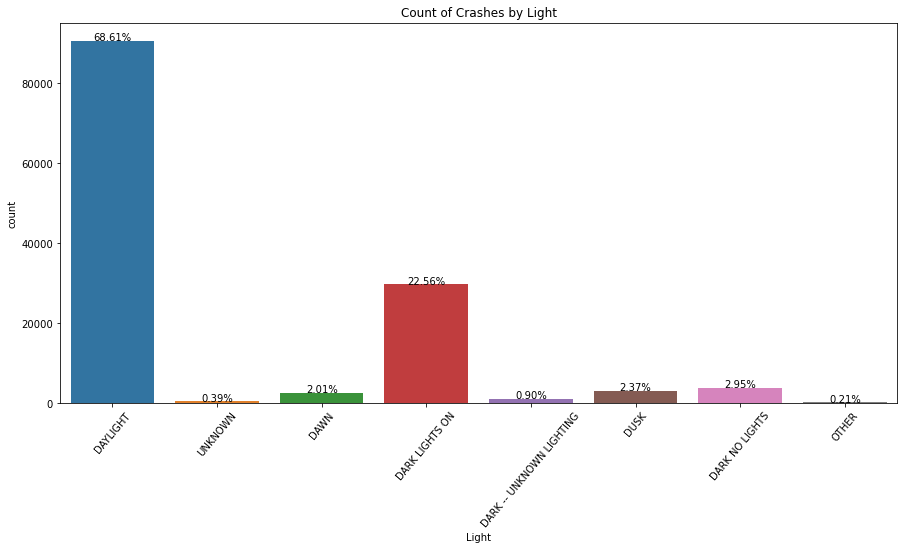

In [16]:
get_count(crash_orig_df, 'Light')

### Using more features from the original data set:

In [17]:
#Clean original data frame to use other features. 
crash_orig_df
crash_orig_df.drop(columns = ['Circumstance', 
                        'Off-Road Description', 
                        'Municipality', 
                        'Related Non-Motorist', 
                        'Non-Motorist Substance Abuse',
                        'Person ID',
                        'Vehicle ID',
                        'Latitude',
                        'Longitude',
                        'Location',
                        'Vehicle Damage Extent',
                        'Report Number',
                        'Local Case Number',
                        'Agency Name',
                        'ACRS Report Type',
                        'Cross-Street Name',
                        'Vehicle Movement',
                        'Vehicle Continuing Dir',
                        'Vehicle Going Dir',
                        'Vehicle First Impact Location',
                        'Vehicle Second Impact Location',
            
                        ],inplace = True)

In [18]:
crash_orig_df['Driver Substance Abuse'].fillna('NONE DETECTED', inplace=True)
crash_orig_df['Traffic Control'].fillna('NO CONTROLS', inplace=True)
crash_orig_df.dropna(inplace = True)
crash_orig_df['Driver Substance Abuse'] = crash_orig_df['Driver Substance Abuse'].apply(lambda x: 'No' if x == 'NONE DETECTED' else 'Yes')

In [19]:
crash_orig_df['Crash Time of Day'] = (crash_orig_df['Crash Date/Time'].dt.hour % 24 + 4) // 4
crash_orig_df['Crash Time of Day'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

In [20]:
print(crash_orig_df.shape)
print(crash_mod_df.shape)

(82869, 24)
(83983, 14)


##### Explanation:
For my EDA I wanted to use features such as severity of injury. Because those are not part of the cleaned data frame, I took the original data frame and did similar cleaning Rufus did on the modified data frame. This was simpler than adding back those columns into the modified data frame because the indices are different, I did not want to risk matching the wrong information together. The data set I modified and the one rufus did have approximately the same shape.

## Exploring Severity of Injury

Exploring the severity of the injury enables us to understand the degree of danger in an accident. The more severe an accident the more urgent resources should be allocated to prevent them from reoccuring. 

#### Substance Abuse and Severity of Injury
Isolating each particular injury, we are looking for the percentage of the drivers being intoxicated and non intoxicated. 

In [85]:
def substance_crash(feature):
    plt.figure(figsize = (8,8))
    plt.title(f'{feature.lower().capitalize()} and Substance Abuse')
    plt.ylabel('Count')
    ax = crash_orig_df[crash_orig_df['Injury Severity']== f'{feature}'].groupby('Driver Substance Abuse')['Injury Severity'].count().sort_values(ascending = False).plot(kind = 'bar')
    plt.xticks(rotation = 0)
    total = (crash_orig_df['Injury Severity']== f'{feature}').sum()
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

(None, None, None, None, None)

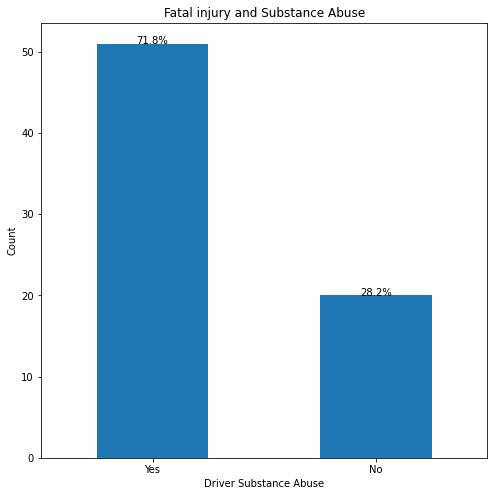

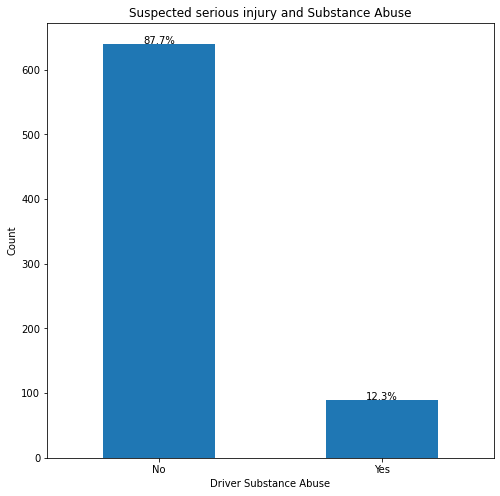

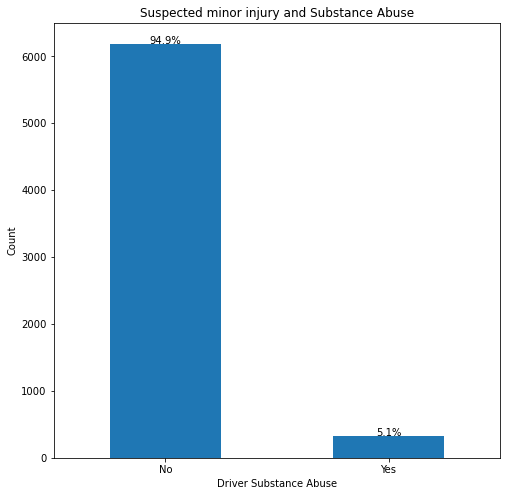

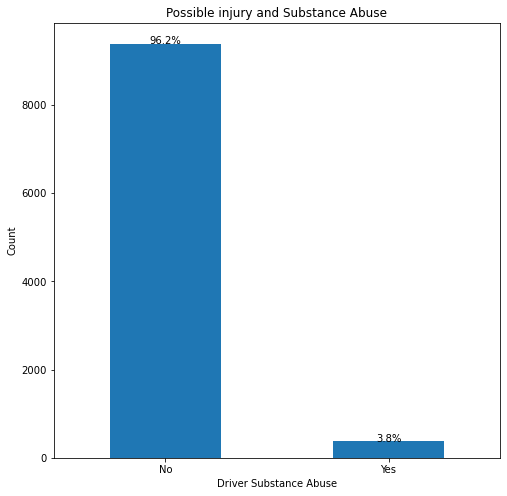

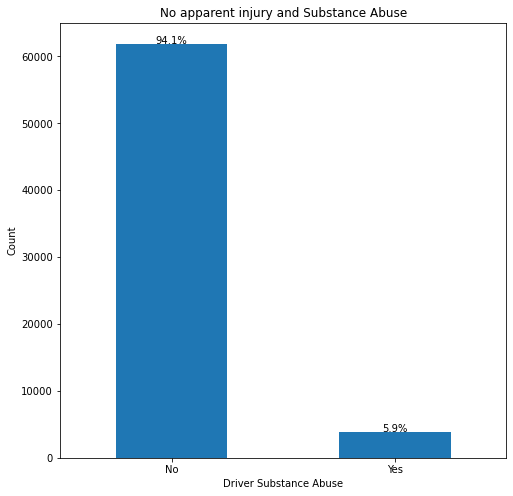

In [22]:
substance_crash('FATAL INJURY'),substance_crash('SUSPECTED SERIOUS INJURY'),substance_crash('SUSPECTED MINOR INJURY'),substance_crash('POSSIBLE INJURY'),substance_crash('NO APPARENT INJURY')

##### Observations:
From the graphs above, we are able to see that for Fatal Injuries, about 72% of the drivers that were at fault were intoxicated. Looking at the other injuries decreasing in severity, most of the drivers at fault are non-intoxicated. 

##### Overview of Intoxicated Drivers and Severity of Injury
These plots are similar to the plots above however the percentage of drivers is being compared to their particular class (the total number of intoxicated driver) rather than comparing it to the total number of injuries. Doing so gives us a realistic percentage of out of the intoxicated drivers what percentage result in a given severity of injury.

In [23]:
def substance_crash_overview(feature):
    plt.figure(figsize = (8,8))
    plt.title(f'{feature.lower().capitalize()} Amongst Intoxicated Drivers')
    ax = crash_orig_df[crash_orig_df['Driver Substance Abuse']=='Yes'].groupby(crash_orig_df['Injury Severity']==f'{feature}')['Driver Substance Abuse'].count().plot(kind = 'bar')
    plt.xlabel('Driver Intoxicated')
    plt.ylabel('Count')
    plt.xticks(rotation = 0)
    total = (crash_orig_df['Driver Substance Abuse']=='Yes').sum()
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

(None, None, None, None, None)

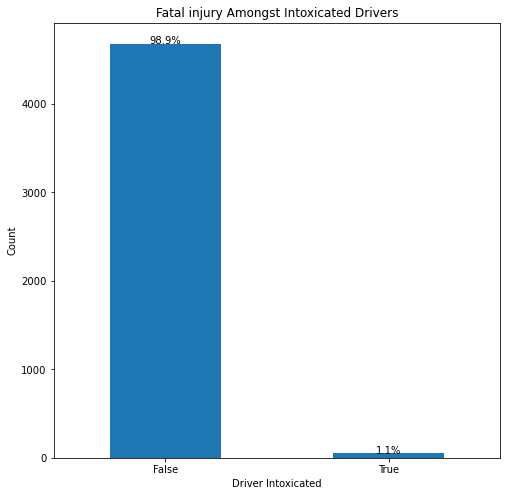

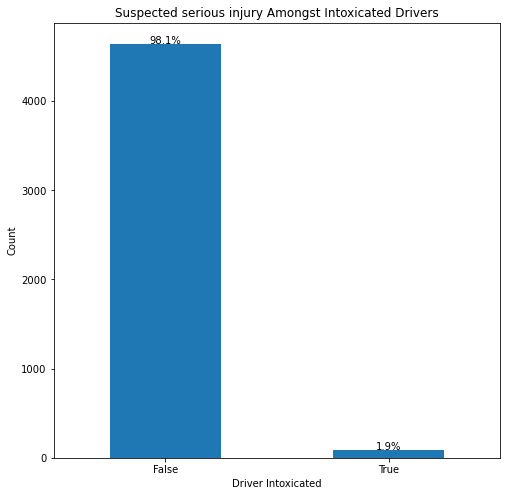

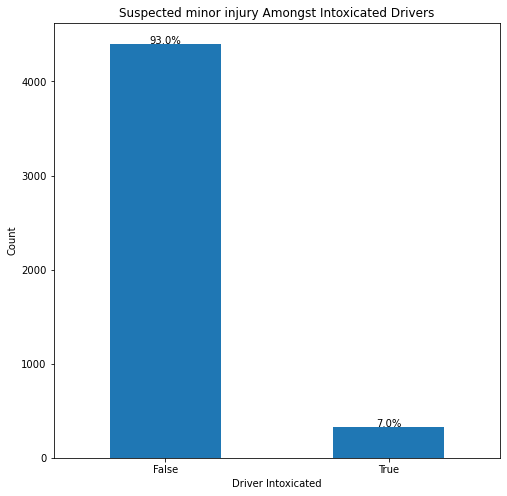

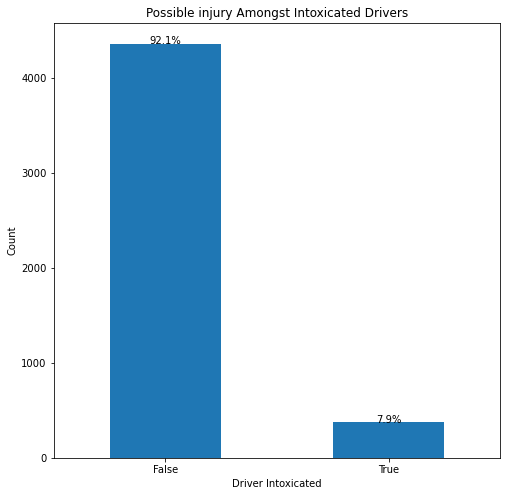

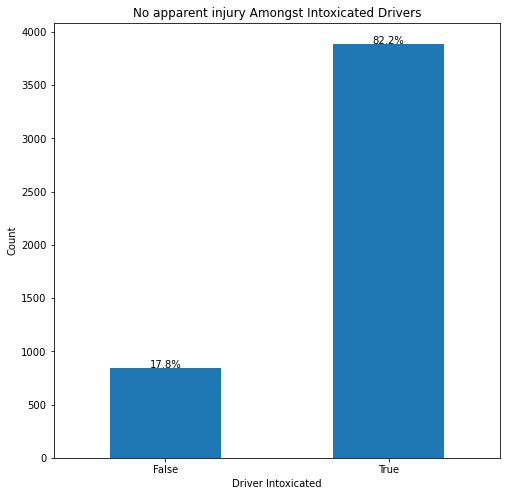

In [24]:
substance_crash_overview('FATAL INJURY'),substance_crash_overview('SUSPECTED SERIOUS INJURY'),substance_crash_overview('SUSPECTED MINOR INJURY'),substance_crash_overview('POSSIBLE INJURY'),substance_crash_overview('NO APPARENT INJURY')

##### Overview of Non-Intoxicated Drivers and Severity of Injury
These plots are similar to the plots above however we are looking at non-intoxicated drivers.

In [25]:
def non_substance_crash_overview(feature):
    plt.figure(figsize = (8,8))
    plt.title(f'{feature.lower().capitalize()} Amongst Non-Intoxicated Drivers')
    ax = crash_orig_df[crash_orig_df['Driver Substance Abuse']=='No'].groupby(crash_orig_df['Injury Severity']==f'{feature}')['Driver Substance Abuse'].count().plot(kind = 'bar')
    plt.xlabel('Driver Non-Intoxicated')
    plt.ylabel('Count')
    plt.xticks(rotation = 0)
    total = (crash_orig_df['Driver Substance Abuse']=='No').sum()
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

(None, None, None, None, None)

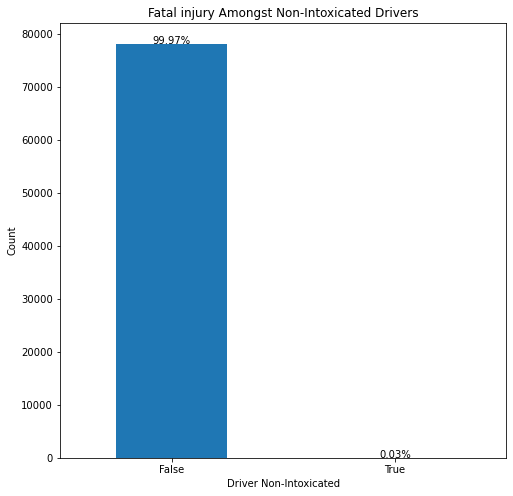

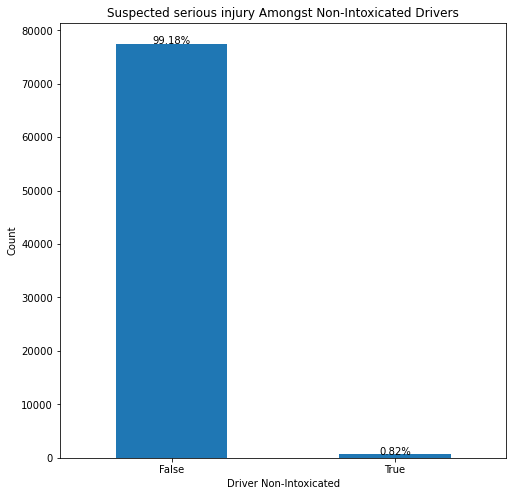

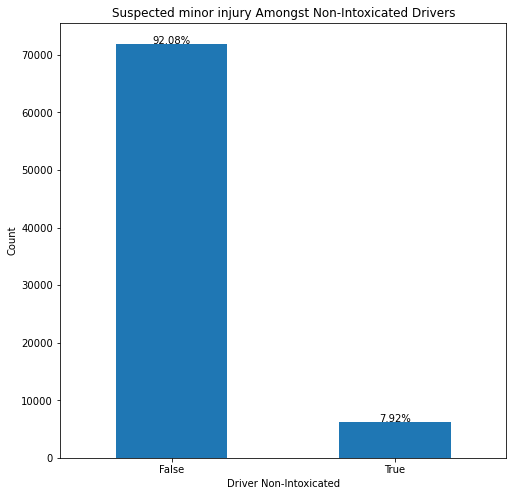

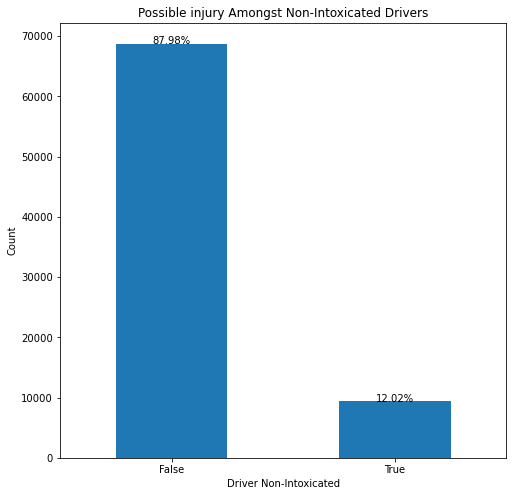

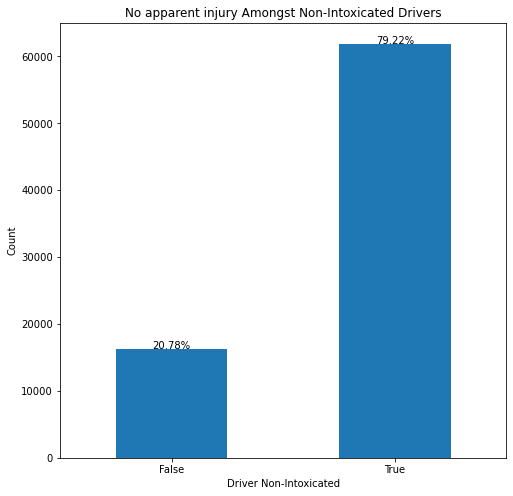

In [26]:
non_substance_crash_overview('FATAL INJURY'),non_substance_crash_overview('SUSPECTED SERIOUS INJURY'),non_substance_crash_overview('SUSPECTED MINOR INJURY'),non_substance_crash_overview('POSSIBLE INJURY'),non_substance_crash_overview('NO APPARENT INJURY')

#### Adding these statistics into a table

In [27]:
data = {'Intoxicated Driver': ['1.1%','1.9%','7.0%','7.9%','82.2%'],
        'Non-Intoxicated Driver':['0.03%','0.82%','7.92%','12.02%','79.2%'],
        'Likelihood of Injury due to Intoxication': [36,2.32,0.88,0.65,1.03]
       }
substance_df = pd.DataFrame(data,index = ['Fatal Injury','Suspected Serious Injury','Suspected Minor Injury','Possible Injury','No Apparent Injury'])
substance_df

,Intoxicated Driver,Non-Intoxicated Driver,Likelihood of Injury due to Intoxication
Fatal Injury,1.1%,0.03%,36.00
Suspected Serious Injury,1.9%,0.82%,2.32
Suspected Minor Injury,7.0%,7.92%,0.88
Possible Injury,7.9%,12.02%,0.65
No Apparent Injury,82.2%,79.2%,1.03


##### Observations:
Now looking at the next table we are still looking at the severity of injury but this time looking at intoxication amongst drivers. We can see that 1.1% of intoxicated drivers result in fatal car accidents, that is about 36 times more than a non intoxicated driver. Next we see that 1.9% of intoxicated drivers get into serious injuries, resulting in 2.3 times more than non intoxicated drivers. We can see the likelihood to fluctuate and get closer to one past the suspected serious injury.


#### Time of the Day vs Severity of Injury

In [28]:
def time_crash(feature):
    plt.figure(figsize = (8,8))
    plt.title(f'{feature.lower().capitalize()} and Time of the day')
    plt.ylabel('Count')
    ax = crash_orig_df[crash_orig_df['Injury Severity']== f'{feature}'].groupby('Crash Time of Day')['Injury Severity'].count().sort_values(ascending = False).plot(kind = 'bar')
    total = (crash_orig_df['Injury Severity']== f'{feature}').sum()
    plt.xticks(rotation = 45)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')


(None, None, None, None)

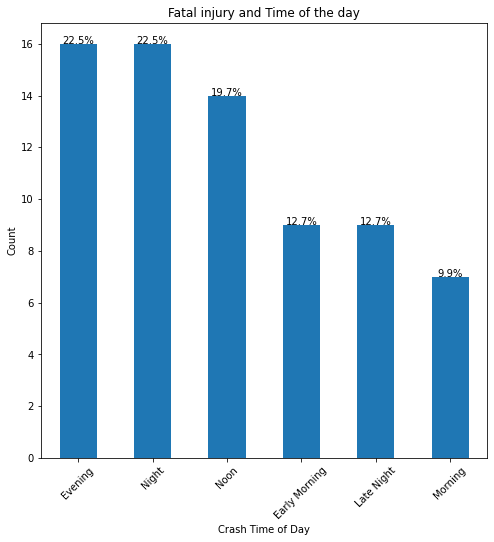

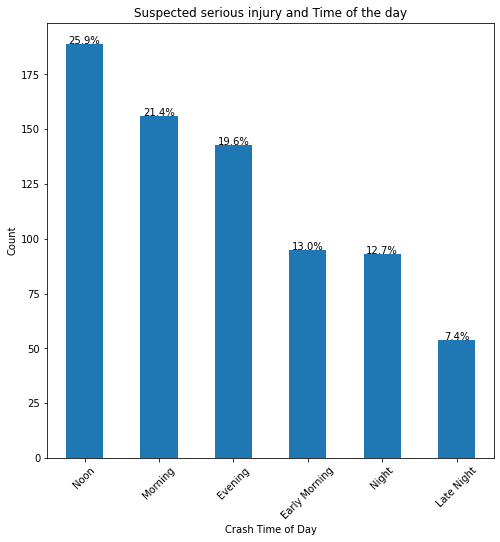

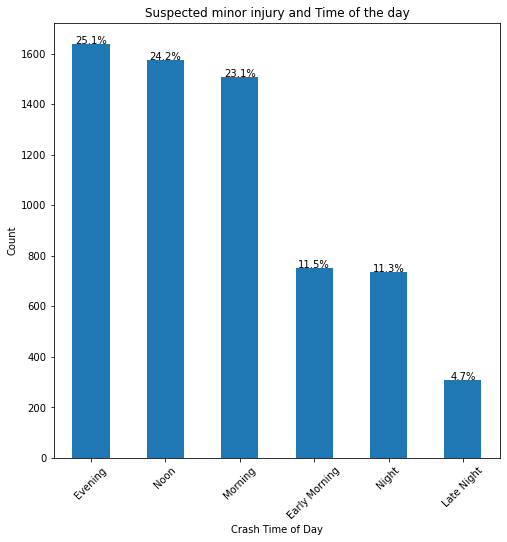

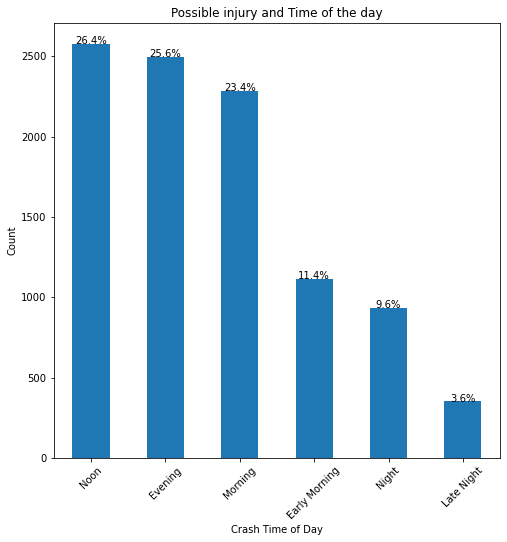

In [29]:
time_crash('FATAL INJURY'),time_crash('SUSPECTED SERIOUS INJURY'),time_crash('SUSPECTED MINOR INJURY'),time_crash('POSSIBLE INJURY')

##### Observation:
What can be seen from the trends above is that noon is a recurrent time when most injuries take place. Reason for so: individuals get out of work to have lunch and are in a rush resulting in car accidents. This can leave room for further recommendation such as allocating more police officers during noon. Another recommendation would be to insight people to not use their vehicles during the day.This can be done by offering public bikes that can be rented through out the city (e.g.: citi bikes, jump bikes, and etc.).

##### Vehicle Body Type vs Severity of Injury
Isolating each particular injury, we are looking for the count of each vehicles with respect to the total number of each specific injury.  

In [30]:
def vehicle_crash(feature):
    plt.figure(figsize = (8,8))
    plt.title(f'{feature.lower().capitalize()} and Vehicle Body Type')
    plt.ylabel('Count')
    ax = crash_orig_df[crash_orig_df['Injury Severity'] == f'{feature}'].groupby('Vehicle Body Type')['Injury Severity'].count().sort_values(ascending = False).head().plot(kind = 'bar')
    total = (crash_orig_df['Injury Severity']== f'{feature}').sum()
    plt.xticks(rotation = 45)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

(None, None, None, None)

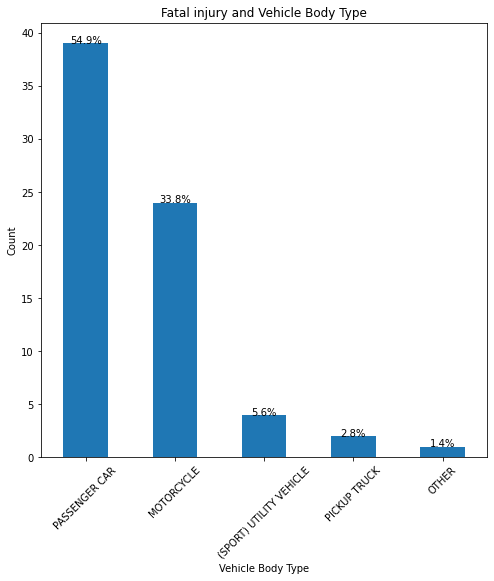

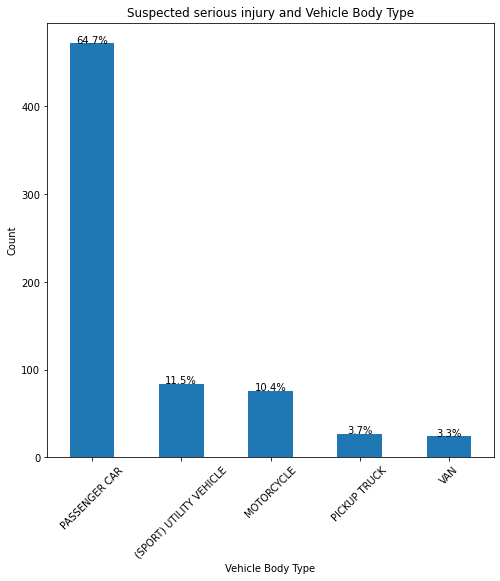

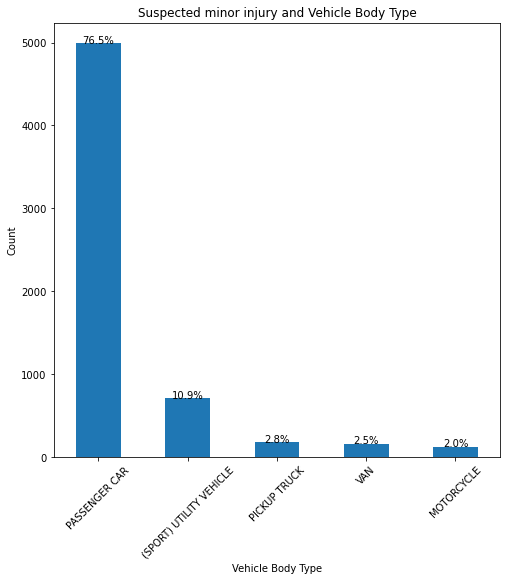

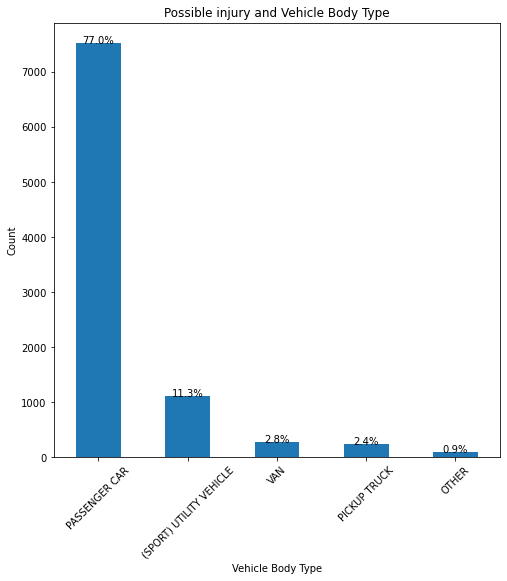

In [31]:
vehicle_crash('FATAL INJURY'),vehicle_crash('SUSPECTED SERIOUS INJURY'),vehicle_crash('SUSPECTED MINOR INJURY'),vehicle_crash('POSSIBLE INJURY')

##### Overview of Vehicle Body Type vs Severity of Injury
Taking 4 vehicle body types and looking at how present they are for each injury. 

##### Passenger Cars

In [88]:
def pass_car_overview(feature):
    plt.figure(figsize = (8,8))
    plt.title(f'{feature.lower().capitalize()} Amongst Passengercar Drivers')
    plt.xlabel('Driver Non-Intoxicated')
    plt.ylabel('Count')
    ax = crash_orig_df[crash_orig_df['Vehicle Body Type']=='PASSENGER CAR'].groupby(crash_orig_df['Injury Severity']==f'{feature}')['Vehicle Body Type'].count().plot(kind = 'bar')
    plt.xticks(rotation = 0)

    total = (crash_orig_df['Vehicle Body Type']=='PASSENGER CAR').sum()
    for p in ax.patches:
             
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

(None, None, None, None, None)

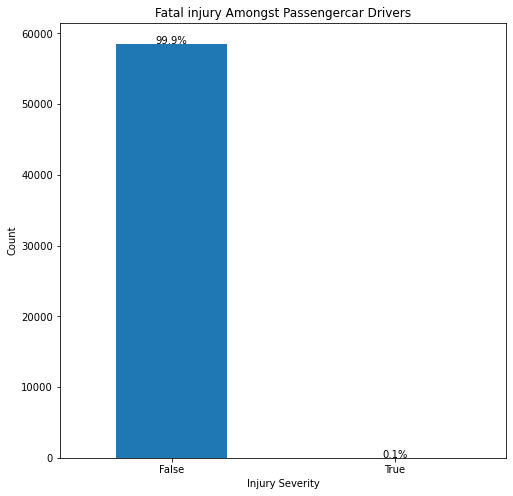

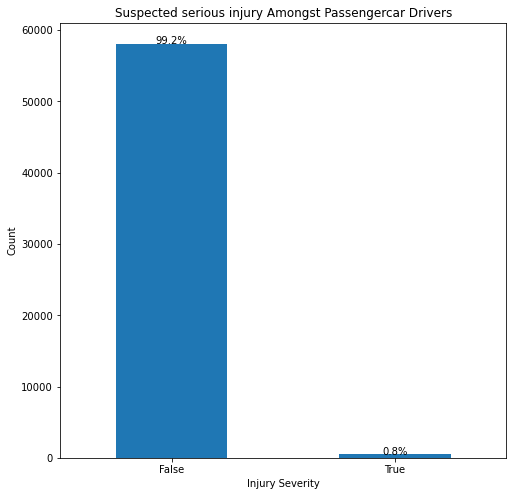

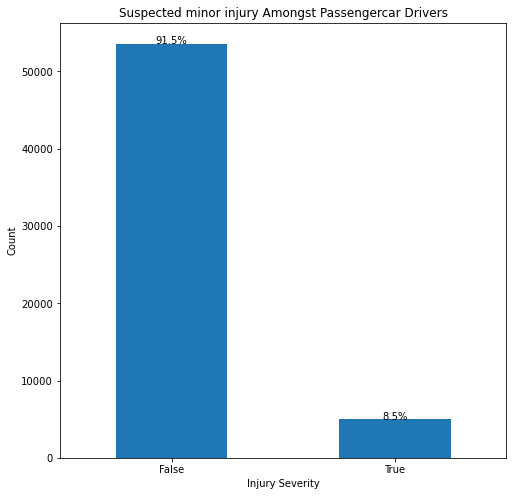

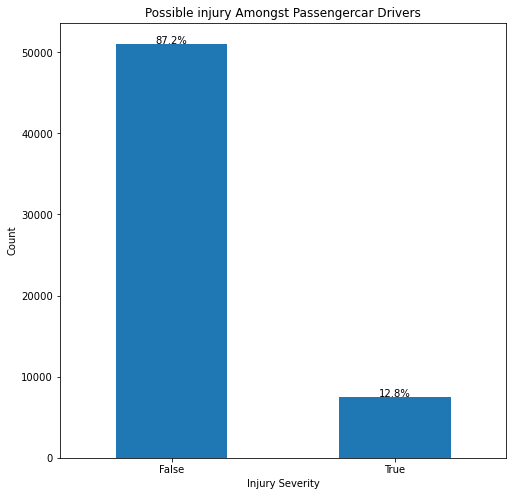

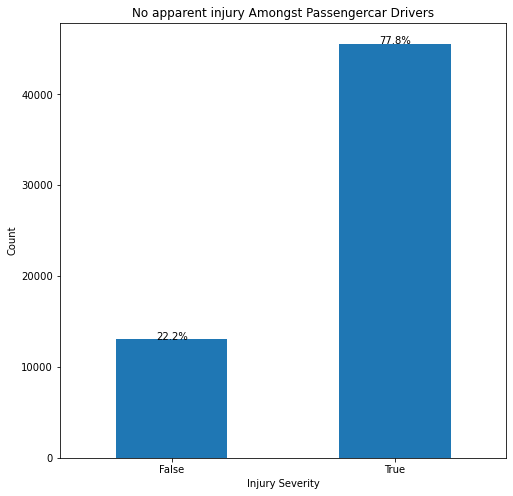

In [89]:
pass_car_overview('FATAL INJURY'),pass_car_overview('SUSPECTED SERIOUS INJURY'),pass_car_overview('SUSPECTED MINOR INJURY'),pass_car_overview('POSSIBLE INJURY'),pass_car_overview('NO APPARENT INJURY')

##### Sports Cars

In [92]:
def sport_car_overview(feature):
    plt.figure(figsize = (8,8))
    plt.title(f'{feature.lower().capitalize()} Amongst Sports Car Drivers')
    plt.xlabel('Driver Non-Intoxicated')
    plt.ylabel('Count')
    ax = crash_orig_df[crash_orig_df['Vehicle Body Type']=='(SPORT) UTILITY VEHICLE'].groupby(crash_orig_df['Injury Severity']==f'{feature}')['Vehicle Body Type'].count().plot(kind = 'bar')
    plt.xticks(rotation = 0)

    total = (crash_orig_df['Vehicle Body Type']=='(SPORT) UTILITY VEHICLE').sum()
    for p in ax.patches:
             
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

(None, None, None, None, None)

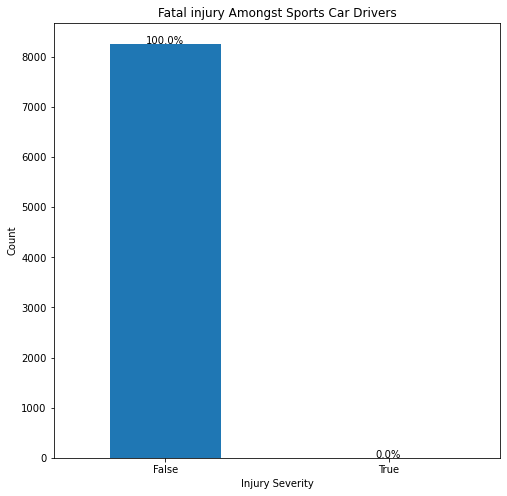

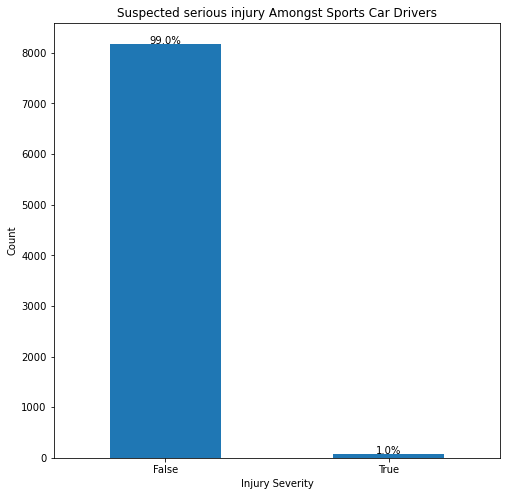

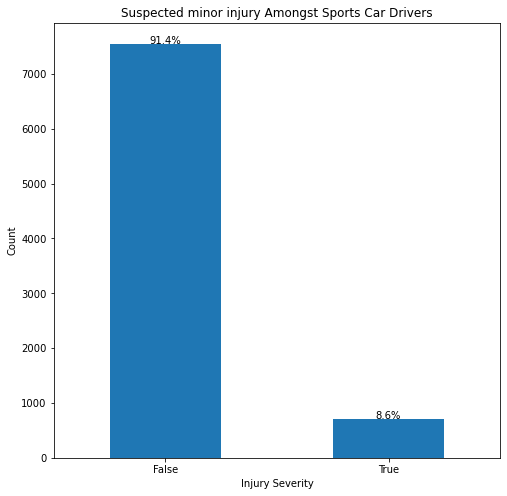

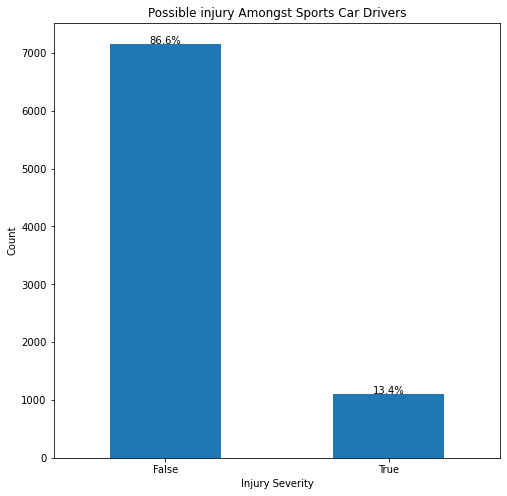

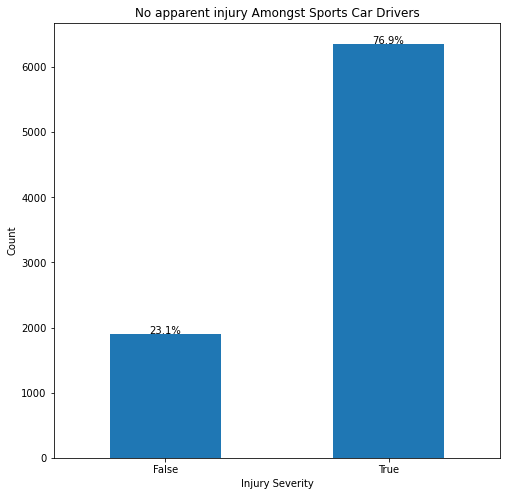

In [93]:
sport_car_overview('FATAL INJURY'),sport_car_overview('SUSPECTED SERIOUS INJURY'),sport_car_overview('SUSPECTED MINOR INJURY'),sport_car_overview('POSSIBLE INJURY'),sport_car_overview('NO APPARENT INJURY')

##### Motorcycles

In [90]:
def motorcycle_overview(feature):
    plt.figure(figsize = (8,8))
    plt.title(f'{feature.lower().capitalize()} Amongst Motorcycle Drivers')
    plt.xlabel('Driver Non-Intoxicated')
    plt.ylabel('Count')
    ax = crash_orig_df[crash_orig_df['Vehicle Body Type']=='MOTORCYCLE'].groupby(crash_orig_df['Injury Severity']==f'{feature}')['Vehicle Body Type'].count().plot(kind = 'bar')
    plt.xticks(rotation = 0)

    total = (crash_orig_df['Vehicle Body Type']=='MOTORCYCLE').sum()
    for p in ax.patches:
             
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

(None, None, None, None, None)

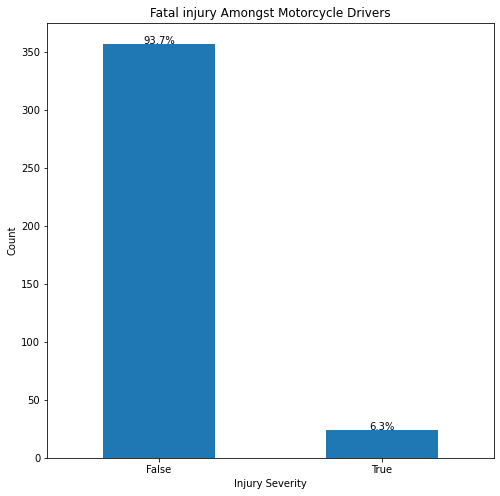

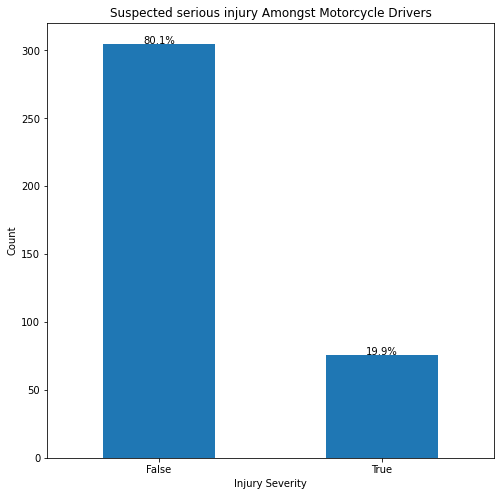

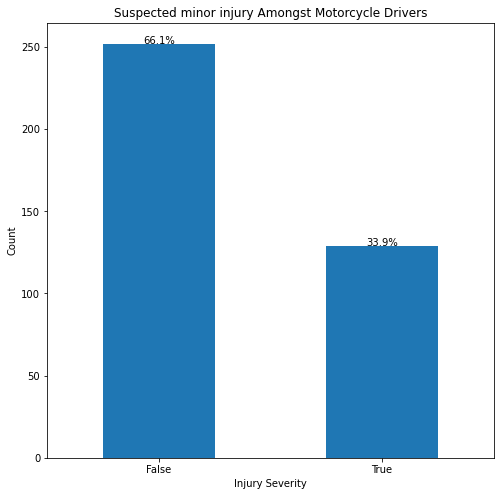

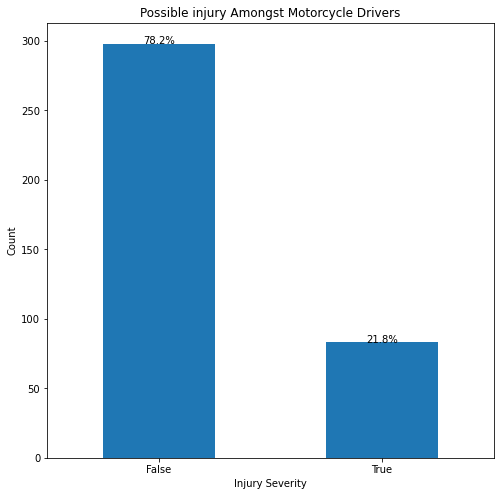

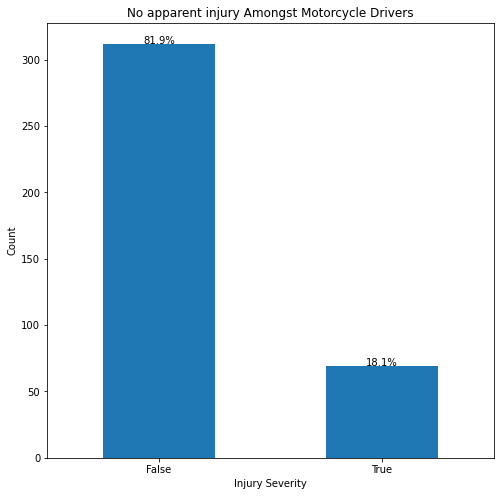

In [91]:
motorcycle_overview('FATAL INJURY'),motorcycle_overview('SUSPECTED SERIOUS INJURY'),motorcycle_overview('SUSPECTED MINOR INJURY'),motorcycle_overview('POSSIBLE INJURY'),motorcycle_overview('NO APPARENT INJURY')

##### Transit Buses

In [96]:
def transit_overview(feature):
    plt.figure(figsize = (8,8))
    plt.title(f'{feature.lower().capitalize()} Amongst Transit Bus Drivers')
    plt.xlabel(f'{feature.lower().capitalize()}')
    plt.ylabel('Count')
    ax = crash_orig_df[crash_orig_df['Vehicle Body Type']=='TRANSIT BUS'].groupby(crash_orig_df['Injury Severity']==f'{feature}')['Vehicle Body Type'].count().plot(kind = 'bar')
    plt.xticks(rotation = 0)

    total = (crash_orig_df['Vehicle Body Type']=='TRANSIT BUS').sum()
    for p in ax.patches:
             
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

(None, None, None, None, None)

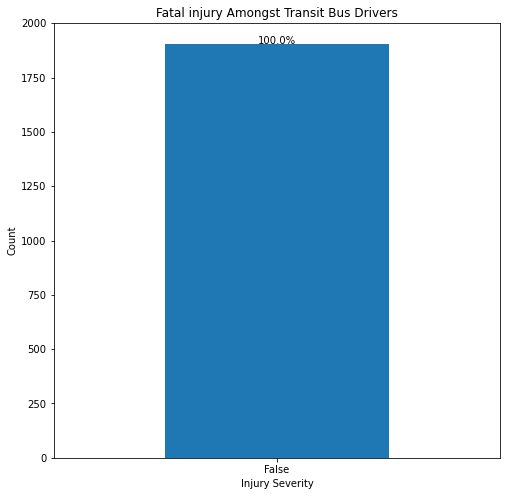

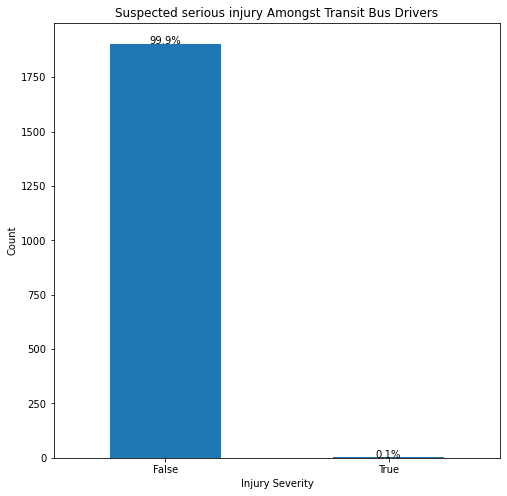

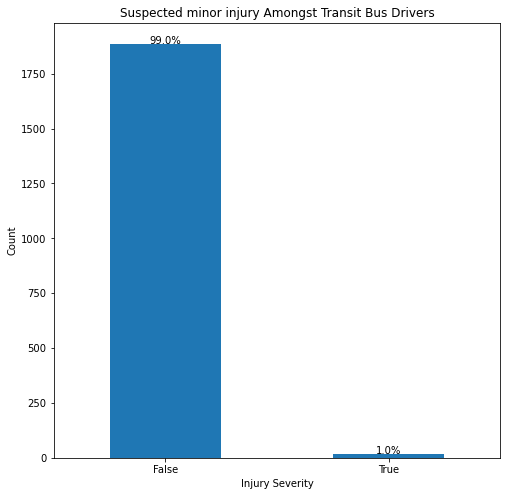

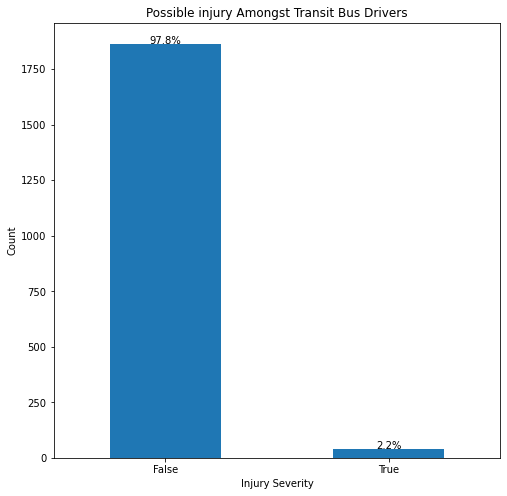

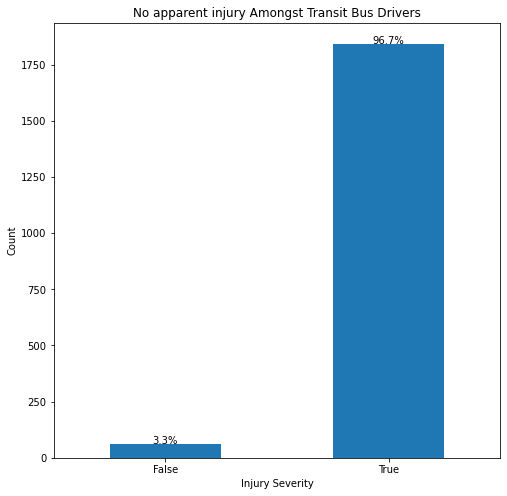

In [97]:
transit_overview('FATAL INJURY'),transit_overview('SUSPECTED SERIOUS INJURY'),transit_overview('SUSPECTED MINOR INJURY'),transit_overview('POSSIBLE INJURY'),transit_overview('NO APPARENT INJURY')

#### Adding these statistics into a table

In [98]:
data = {'Passenger Car': ['0.1%','0.8%','8.5%','12.8%','77.8%'],
        'Sports Car':['0.0%','1.0%','8.6%','13.4%','76.9%'],
        'Motorcycle': ['6.3%','19.9%','33.9%','21.8%','18.1%'],
        'Transit Bus':['0%','0.1%','1.0%','2.2%','96.7%']
       }
safest_df = pd.DataFrame(data,index = ['Fatal Injury','Suspected Serious Injury','Suspected Minor Injury','Possible Injury','No Apparent Injury'])
safest_df

,Passenger Car,Sports Car,Motorcycle,Transit Bus
Fatal Injury,0.1%,0.0%,6.3%,0%
Suspected Serious Injury,0.8%,1.0%,19.9%,0.1%
Suspected Minor Injury,8.5%,8.6%,33.9%,1.0%
Possible Injury,12.8%,13.4%,21.8%,2.2%
No Apparent Injury,77.8%,76.9%,18.1%,96.7%


##### Observations:
We are able to see that 6.1% of motorcycles results in fatal injuries, which among the 4 vehicles is the highest. Looking specifically at motorcycles we can see that this number increases when looking at suspected serious injuries. Taking these two severe injuries into consideration, 26.2% of motorcycle accidents results in grave injuries, that is almost 1/3 of motorcycle drivers. We can infer that motorcycles are the most dangerous vehicles among the 4 vehicles. Next looking at passenger cars and sports cars together we can see that they have similar statistics. Sports cars resulted in no fatalities while 0.1% of passenger cars resulted in fatalities. We are able to see that about 77.8 % of passenger cars and 76.9 % of sport cars (similar percentage) resulted in no apparent injury. Looking at the transit bus, we are able to see a clear difference among the other vehicles. Transit buses resulted in no fatal injuries and 96.7 % of accidents in transit buses result in no apparent injury. This leads us to infer that transit buses are the safest transportation method. 


### Looking at Single Vehicle Body Types and Fault

In [86]:
def fault_crash(feature):
    plt.figure(figsize = (8,8))
    plt.title(f'{feature.lower().capitalize()} and Driver Fault')
    plt.ylabel('Count')
    ax = crash_orig_df[crash_orig_df['Vehicle Body Type']==f'{feature}'].groupby('Driver At Fault')['Vehicle Body Type'].count().sort_values(ascending = False).head(2).plot(kind = 'bar')
    total = (crash_orig_df['Vehicle Body Type']== f'{feature}').sum()
    plt.xticks(rotation = 0)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

(None, None, None, None, None)

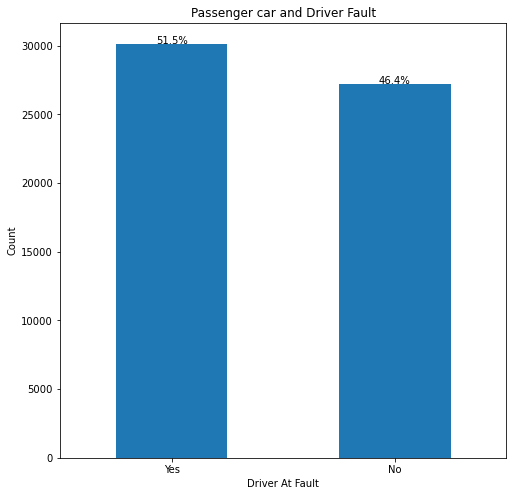

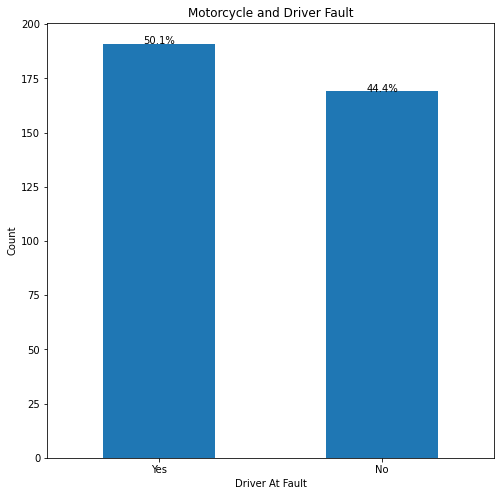

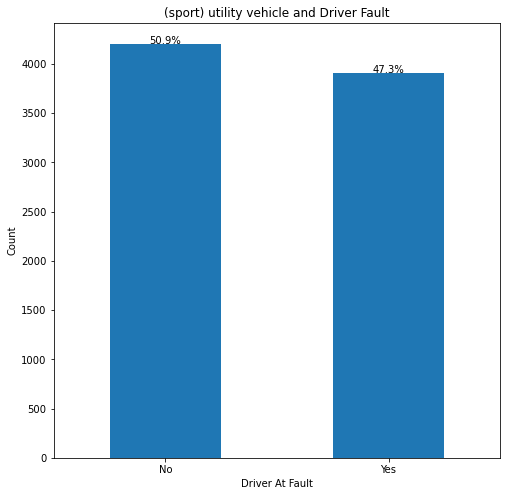

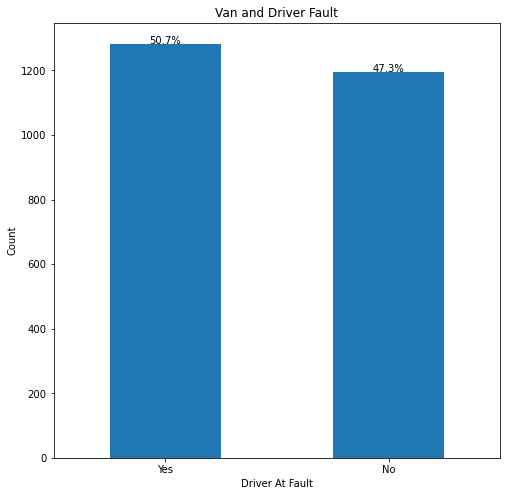

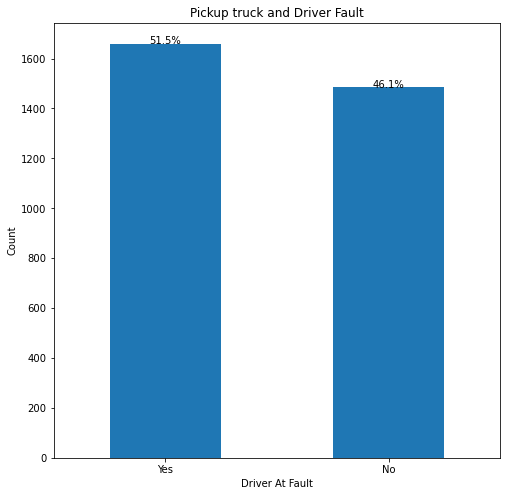

In [87]:
fault_crash('PASSENGER CAR'),fault_crash('MOTORCYCLE'),fault_crash('(SPORT) UTILITY VEHICLE'),fault_crash('VAN'),fault_crash('PICKUP TRUCK')

##### Observations:
Looking at the data above passenger cars, motorcyles, vans, and pick up trucks are at fault 50% of the time or more. The only vehicle that is at fault less than 50% of the time is sports cars.

### Looking At Road Types

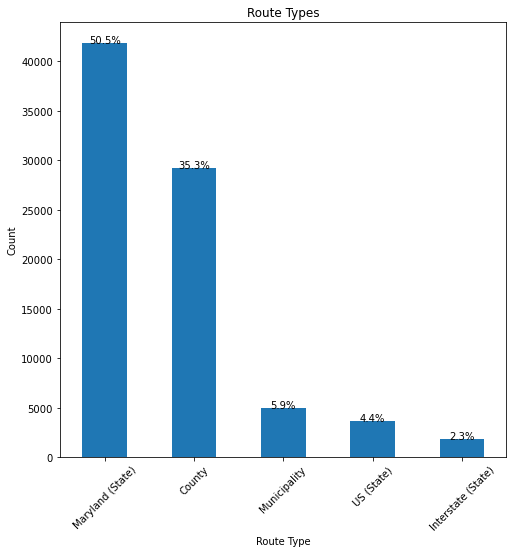

In [41]:
plt.figure(figsize = (8,8))
plt.title('Route Types')
plt.ylabel('Count')
ax = crash_orig_df.groupby('Route Type')['Vehicle Body Type'].count().sort_values(ascending = False).head().plot(kind = 'bar')
plt.xticks(rotation = 45)
total = (crash_orig_df['Route Type']).count()
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

##### Observations:
We are able to see that most car accidents happen in the highway. Maryland (State) highway accounts for 50.5% of the car accidents